# 고양이 수염 스티커 만들기

## 목차
### Face landmark?
### HOG/SVM
### 스티커 적용하기
### 회고

## Face landmark

Face Landmark란 얼굴의 특징점을 말한다.예를들어 동공의 위치, 입술과 눈썹의 좌표등 얼굴에 있는 특징점들을 
x,y값으로 리턴하게 된다. 대표적인 Python 라이브러리 중에서 dlib과 opencv로 Landmark를 추출하는 방법이 있다.

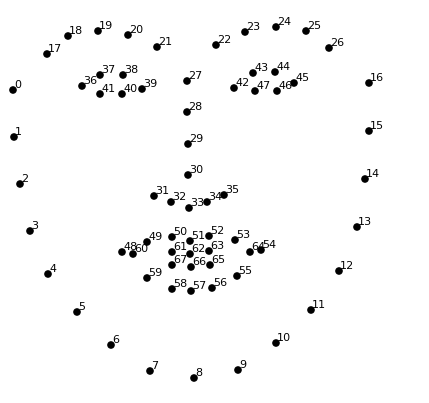

### Hog란?

Histogram of Oriented Gradients의 약자로서 일반적으로 보행자 검출이나 사람의 형태에 대한 검출같은 Object Tracking에 많이 사용되는 Feature중 하나이다. img의 지역적인 Gradient를 해당 영상의 특징으로 사용하는 방법이다.

특징으론 Edge의 양과 방향을 구분하는 특성이 있고, Overlap을 이용하여 계산하기 때문에 어느정도 Shift에도 
적응할 수 있는 능역이 있다.

### SVM이란?

Support Vector Machine의 약자로서 
인공지능 기계학습 분야 중 하나로 패턴인식,자료분석을 위한 지도학습 모델이다.
즉,2개의 범주를 분류하는 이진 분류기이다.주로 분류와 회귀분석을 위해 사용되며, SVM알고리즘을 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할 것인지 판단하는 비확률적 이진 선형분류 모델을 만들게 된다.

### 스티커 적용하기

In [454]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

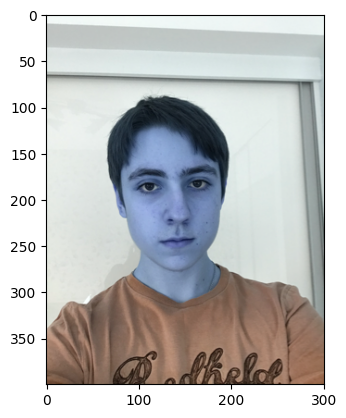

In [455]:
path = '../1.png'
img_bgr = cv2.imread(path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

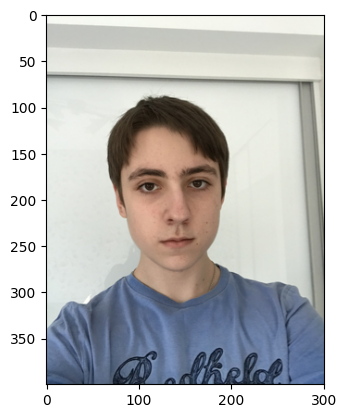

In [456]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [457]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


rectangles[[(67, 153) (196, 282)]]


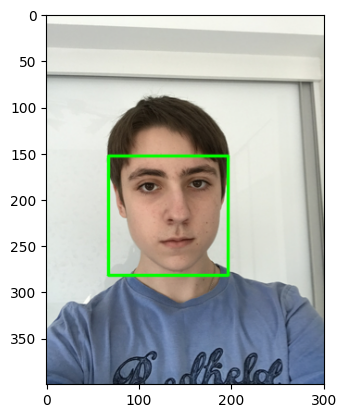

In [458]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [459]:
model_path = '../shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)

In [460]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

68


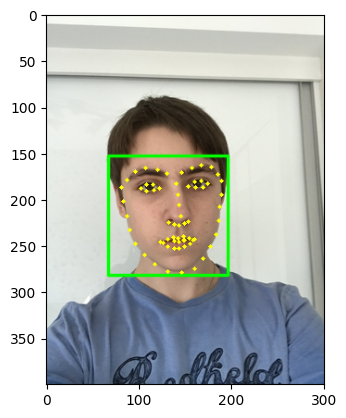

In [461]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()

In [462]:
for dlib_rect,landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*2
    h = (landmark[33][1] - landmark[27][1])*2
    print('(x,y): (%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(145, 218)
(x,y): (145,218)
(w,h):(86,90)


In [463]:
sticker_path = '../2.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) 
print (img_sticker.shape) 

(90, 86, 3)


In [464]:
refined_x = x-w //2
refined_y = y-h //2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

(x,y):(102, 173)


In [465]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] #
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (102,173)


In [466]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

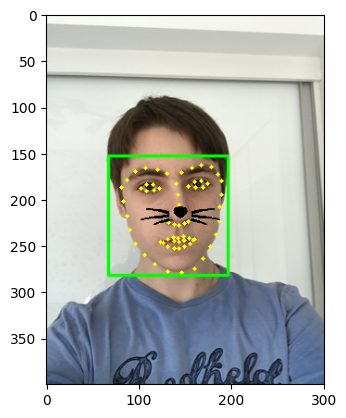

In [467]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 측면사진 적용

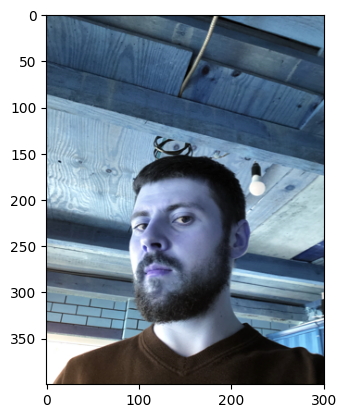

In [468]:
path = '../3.png'
img_bgr = cv2.imread(path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

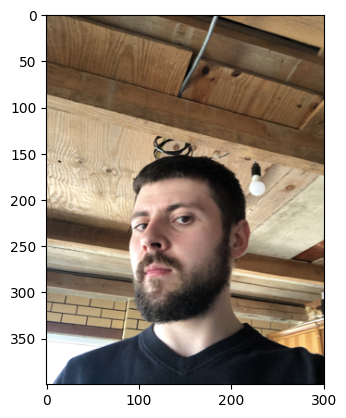

In [469]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

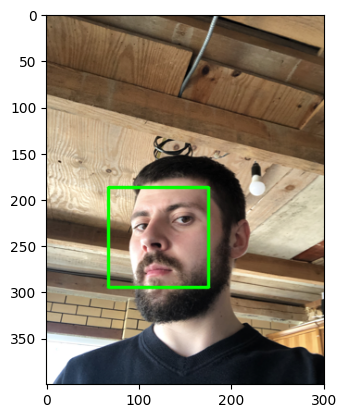

In [470]:
import dlib
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

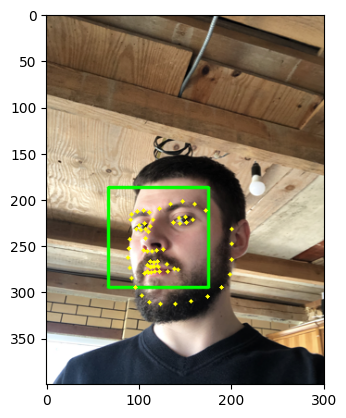

In [471]:
import os
model_path = '../shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(landmark):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(107, 242)
(x,y) : (107,188)
(w,h) : (109,109)
(109, 109, 3)
(x,y) : (53,195)


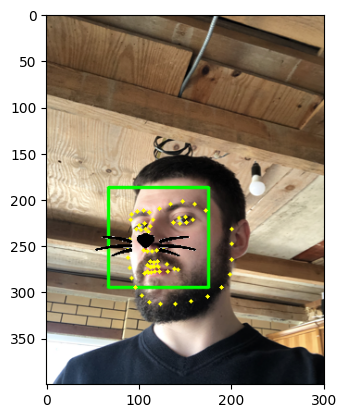

In [472]:
#코 중심점 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코 중심 index 30
    x = landmark[30][0] #x축
    y = landmark[30][1] - dlib_rect.height()//2  #y축
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#스티커 이미지 읽어서 적용
sticker_path = '../2.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#스티커 이미지 추가를 위해 x,y좌표 조정
refined_x = x - w // 2 
refined_y = y + h // 15
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

#원본이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
sticker_added = cv2.addWeighted(img_sticker, 0.5, sticker_area, 0.5, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

#결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()